### 면적 그래프

In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "data/malgun.ttf"     #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [5]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel("data/시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [8]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


stacked=False
- 데이터를 누적하지 않고 서로 겹쳐서 표현되는 면적 그래프

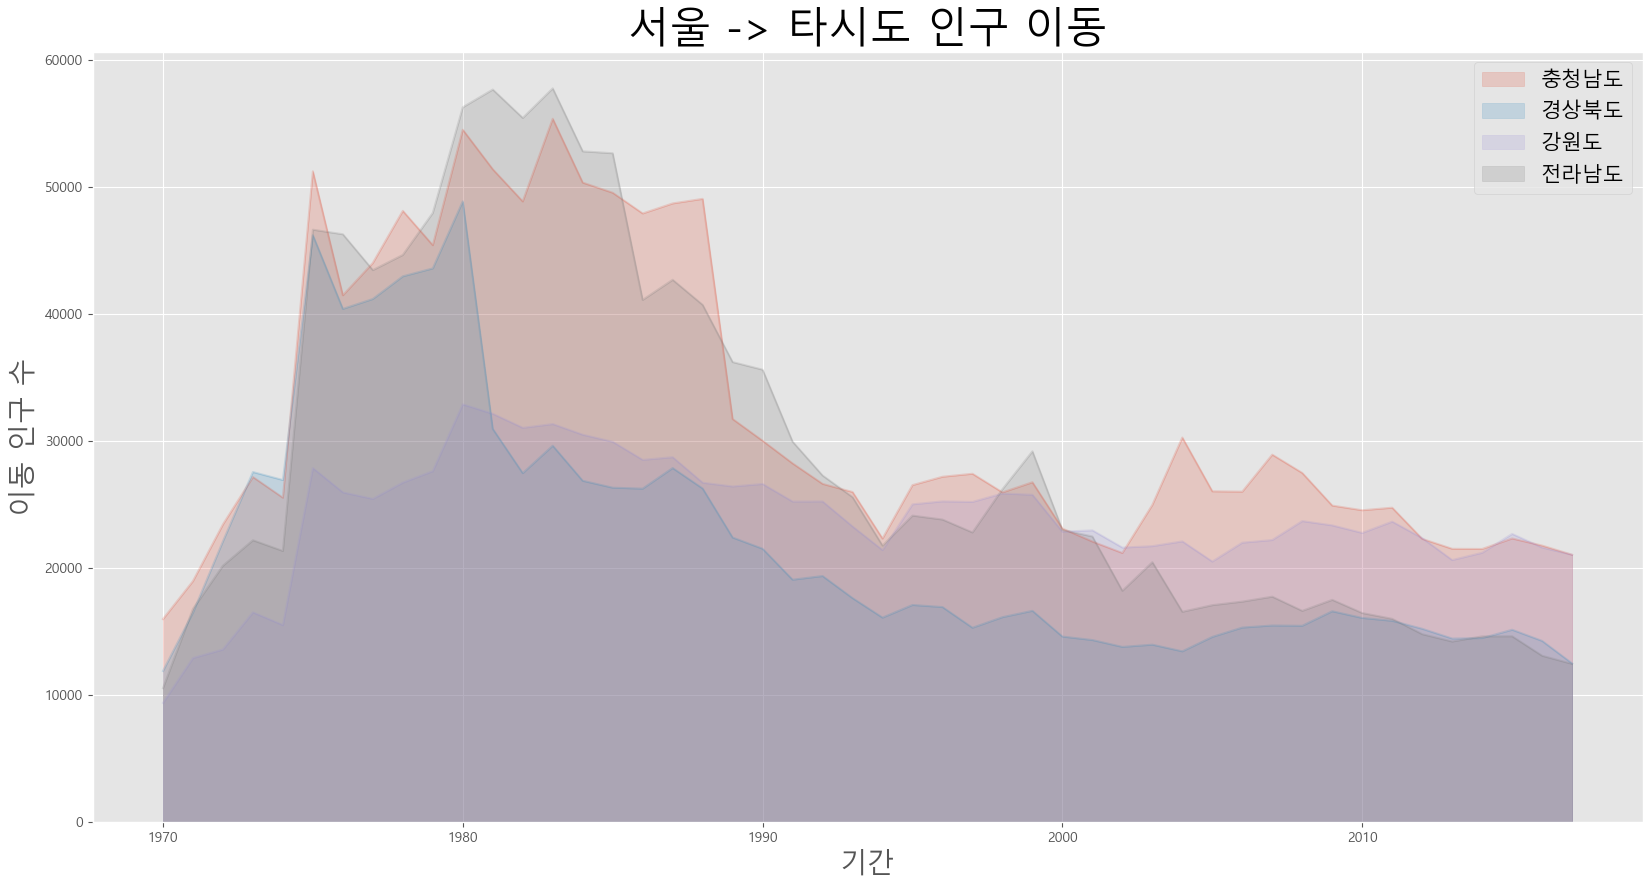

In [12]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

stacked=True
- 선 그래프들이 서로 겹치지 않고 위 아래로 데이터가 누적되는 면적 그래프

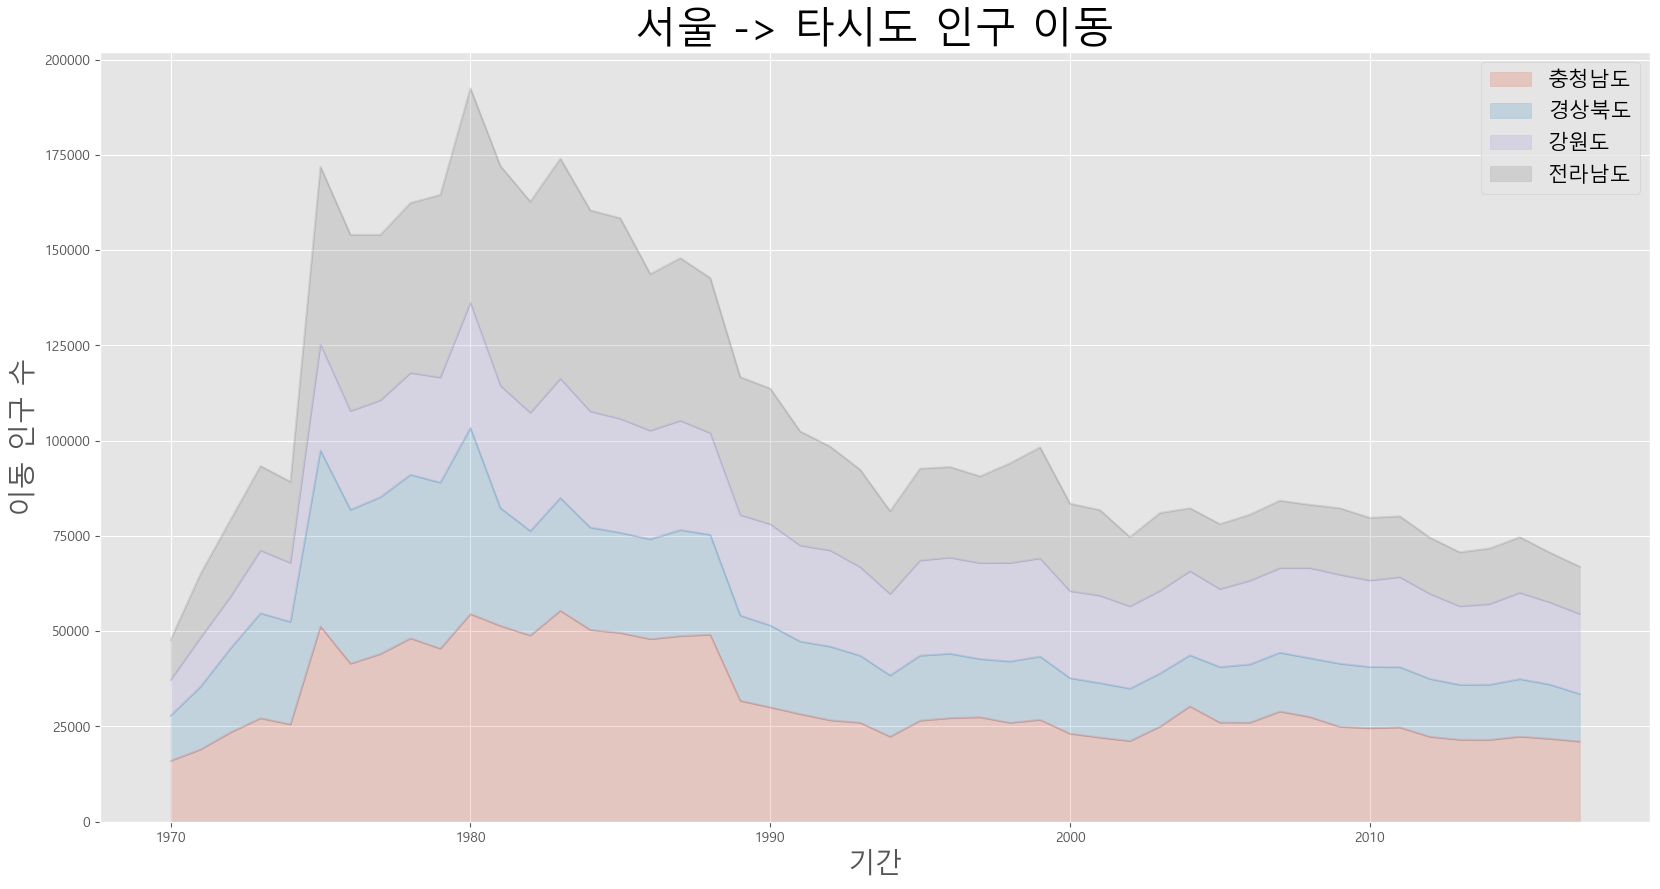

In [13]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()